In [11]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.getcwd())) + "/..")
if os.getcwd().endswith("Topic1"):
    os.chdir("..")
    print(f"Changed to {os.getcwd()}")

from codebase import (
    get_total_inhabitants_and_willingness,
    plot_value_by_buurt_heatmap, 
    plot_willingness_by_buurt_heatmap,
    load_demograhics, 
    load_buurt_data,
    add_willingness_to_cycle_column,
    demographics_population_column, 
    punt_buurt_code_column, 
    demographics_buurt_code_column
)

The following is a simple calculation of the number of people who live within a set number of minutes by a chosen method of transport and of those how many are willing to cycle according to the given functions.

In [2]:
within_mins = 1e9
punt = "basis" # ibis, hbo_wo, mbo, basis, highschool, bus, trein
mode = "fiets" # fiets, ebike
location = "Elementary Schools" # Elementary Schools, High Schools, Universities, Train - NS, Train - Local

total, total_willing = get_total_inhabitants_and_willingness(punt1=punt, mode=mode, within_mins=within_mins, location=location, verbose=True)

Loaded file from CSV
Demographics and filtered dataframes do not match in length: 14405 vs 6439109, ignoring missing values
Total inhabitants within 1000000000.0 minutes of basis from buurt: 17806390 of 17811291 = 99.97% of the Netherlands
Total willingness to cycle of those: 508436 of 17806390 = 2.86%


In [3]:
mode = "fiets"
punt1 = "hbo_wo"
location = "Universities"

df_demographics = load_demograhics()
df_demographics[punt_buurt_code_column] = df_demographics[demographics_buurt_code_column]

Loaded file from CSV


Here is shown how to add a columns of the percentage of people willing to cycle to the specified location:

In [ ]:
df_punt = load_buurt_data(punt1, mode=mode)
willingness_col_name = "willingness_percentage_" + punt1 + "_" + mode + "_" + location.replace(" ", "_").lower()
df_with_willingness = add_willingness_to_cycle_column(df_punt, location, mode, willingness_col=willingness_col_name)
print(df_with_willingness.head())

  hbo_wo_id     bu_code  reistijd_min  reisafstand_m  afstand_hemelsbreed_m  \
0      21PL  BU04390502          91.0        23839.0                  20595   
1      00DV  BU04390502          91.0        23839.0                  20595   
2      21PL  BU04390201          92.0        24043.0                  21004   
3      00DV  BU04390201          92.0        24043.0                  21004   
4      21PL  BU04390202          95.0        24937.0                  21723   

   omrijdfactor  willingness_percentage_hbo_wo_fiets_elementary_schools  
0          1.16                                           0.001040       
1          1.16                                           0.001040       
2          1.14                                           0.001009       
3          1.14                                           0.001009       
4          1.15                                           0.000924       


The following function allows us to plot a choropleth for any value associated with a neighbourhood (buurt) 

c:\Users\toell\Documents\GitHub\Design-of-AI-driven-business-operation\codebase\plotting\plots.py:102: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', fontsize='small')


<Figure size 1000x1000 with 0 Axes>

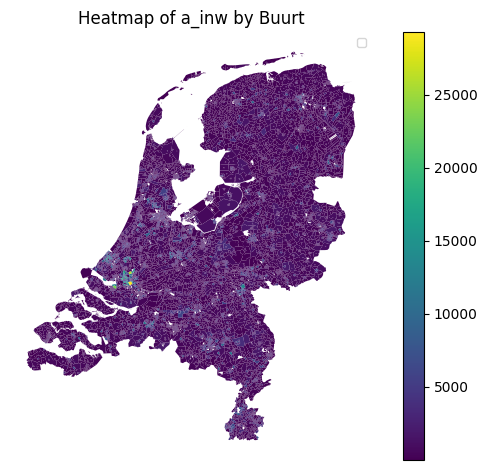

In [4]:
plot_value_by_buurt_heatmap(
    df_punt=df_demographics, 
    col_name=demographics_population_column, 
    show=True, 
    savename="graphics/nl_maps/population_by_buurt.png", 
    cmap='viridis'
)

This all comes together in the following function which plots the willingness to cycle as a choropleth, simply taking the mode and location:

<Figure size 1000x1000 with 0 Axes>

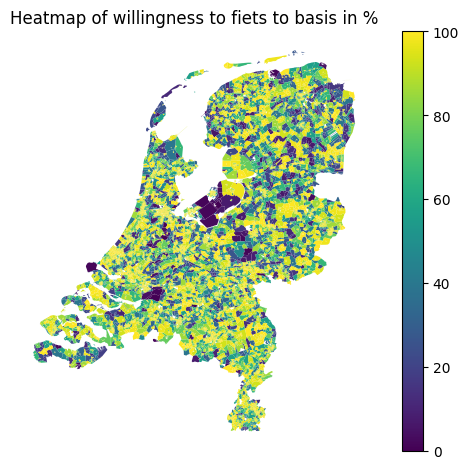

In [5]:
punt = "basis" # ibis, hbo_wo, mbo, basis, highschool, bus, trein
mode = "fiets" # fiets, ebike
location = "Elementary Schools" # Elementary Schools, High Schools, Universities, Train - NS, Train - Local

plot_willingness_by_buurt_heatmap(punt, mode, location, savename=f"graphics/nl_maps/{punt}_by_{mode}.png")